<a href="https://colab.research.google.com/github/Bhargavi19/AdultDatasetAnalysis/blob/main/DV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from catboost import CatBoostClassifier
import warnings
from statsmodels.graphics.mosaicplot import mosaic
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
# define the dataset location
filename = 'adult-all.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None, na_values='?')
dataframe.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

dataframe = dataframe.dropna() # drop rows with missing

# summarize the shape of the dataset
print(dataframe.shape)

# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(45222, 15)
Class=<=50K, Count=34014, Percentage=75.216%
Class=>50K, Count=11208, Percentage=24.784%


In [3]:
dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Preprocessing

In [4]:
# dataframe['workclass'] = dataframe['workclass'].astype('category').cat.codes
# dataframe['education'] = dataframe['education'].astype('category').cat.codes
# dataframe['marital-status'] = dataframe['marital-status'].astype('category').cat.codes
# dataframe['occupation'] = dataframe['occupation'].astype('category').cat.codes
# dataframe['relationship'] = dataframe['relationship'].astype('category').cat.codes
# dataframe['race'] = dataframe['race'].astype('category').cat.codes
# dataframe['sex'] = dataframe['sex'].astype('category').cat.codes
# dataframe['native-country'] = dataframe['native-country'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('object')

#dataframe.drop(columns='education-num') # education and education-num is the same thing

# Data Analysis

In [5]:
# description of continuous variables
# catcols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
# intcols = ['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss', 'hours-per-week']
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,"45,222.0","45,222.0","45,222.0","45,222.0","45,222.0","45,222.0"
mean,38.5,"189,734.7",10.1,"1,101.4",88.6,40.9
std,13.2,"105,639.2",2.6,"7,506.4",405.0,12.0
min,17.0,"13,492.0",1.0,0.0,0.0,1.0
25%,28.0,"117,388.2",9.0,0.0,0.0,40.0
50%,37.0,"178,316.0",10.0,0.0,0.0,40.0
75%,47.0,"237,926.0",13.0,0.0,0.0,45.0
max,90.0,"1,490,400.0",16.0,"99,999.0","4,356.0",99.0


In [6]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
temp = list(dataframe.dtypes)
intCols, objCols = [], []
for i in range(len(temp)):
    if(temp[i] == 'O'):
        objCols.append(columns[i])
    else:
        intCols.append(columns[i])
objCols = objCols[:-1]
print("Integer Type Columns:", intCols)
print("Object Type Columns:", objCols)

Integer Type Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Object Type Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


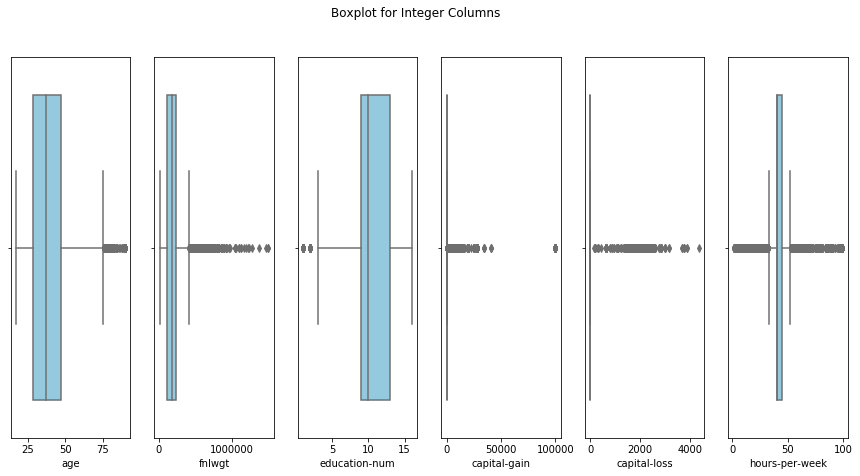

In [7]:
plt.figure(figsize=(15, 7))
N = len(intCols)
for i in range(N):
    plt.subplot(1, N, i+1)
    sns.boxplot(dataframe[intCols[i]], color = 'skyblue')
plt.suptitle('Boxplot for Integer Columns')
plt.show()

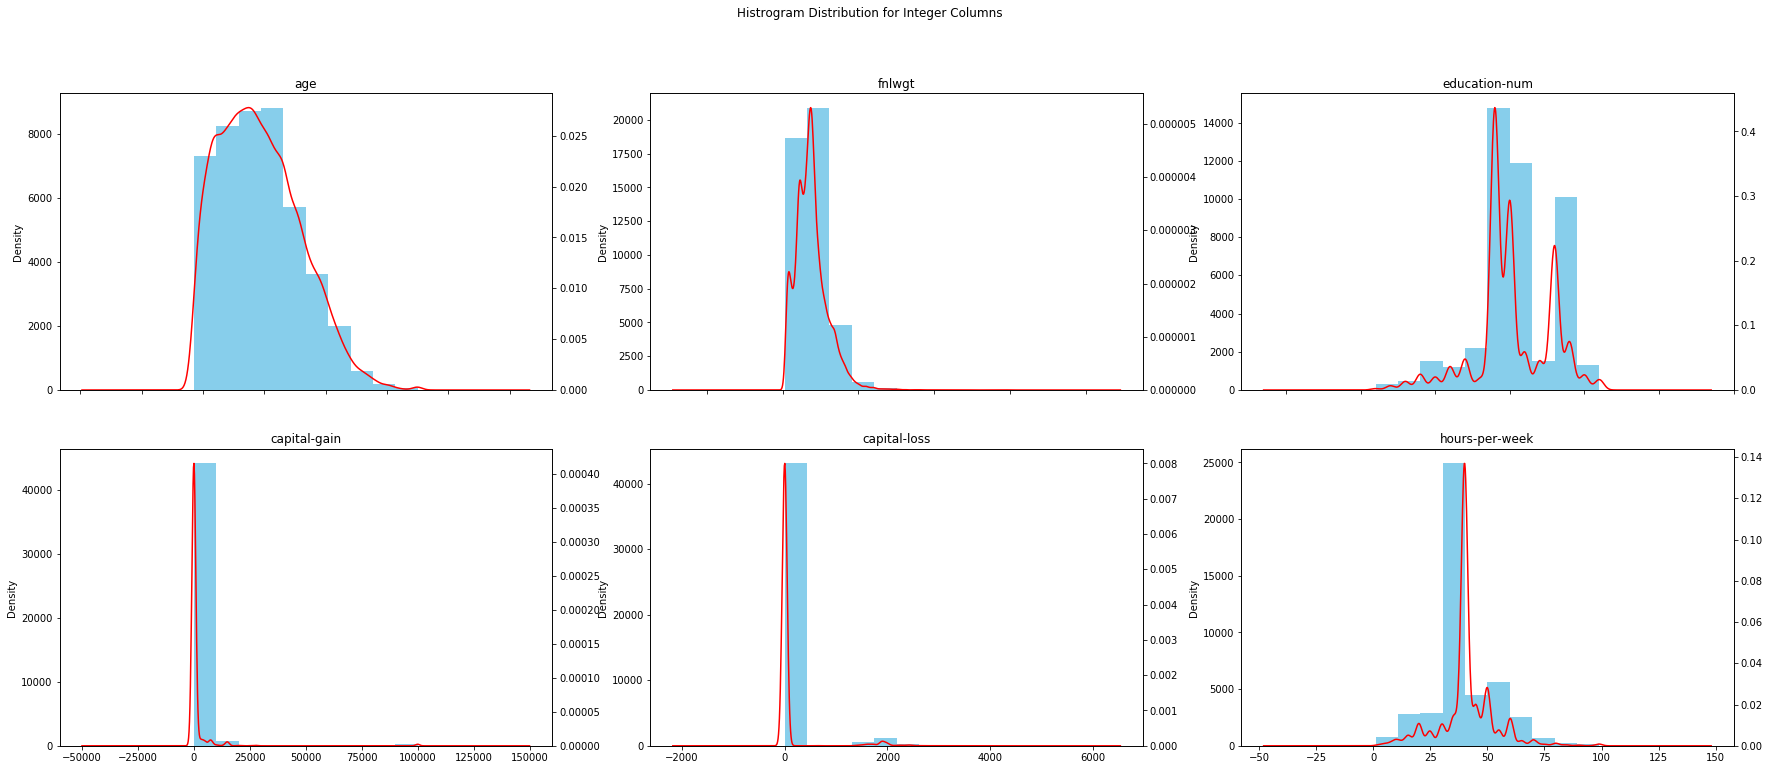

In [8]:
intData = dataframe[intCols]
k = len(intData.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 10, m * 6))
for i, (name, col) in enumerate(intData.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='skyblue')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)
plt.suptitle('Histrogram Distribution for Integer Columns')
plt.show()

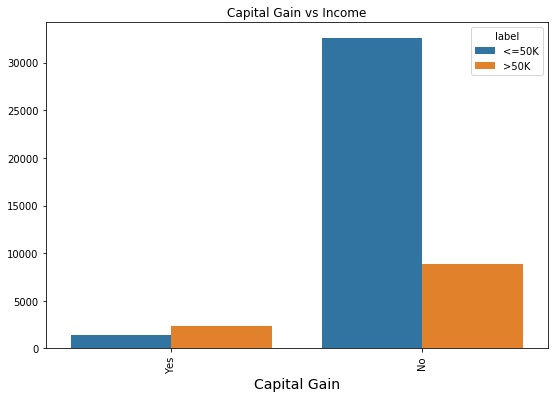

In [9]:
dataframe.loc[dataframe['capital-gain']!=0,'capital-gain'] = 'Yes'
dataframe.loc[dataframe['capital-gain']!='Yes','capital-gain'] = 'No'

fig = plt.figure(figsize = (9,6))
ax=sns.countplot(dataframe['capital-gain'], hue=dataframe['label'])
ax.set_title('Capital Gain vs Income')
plt.xlabel("Capital Gain",fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

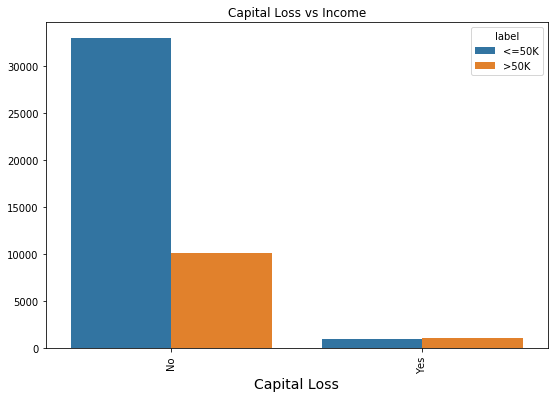

In [10]:
dataframe.loc[dataframe['capital-loss']!=0,'capital-loss'] = 'Yes'
dataframe.loc[dataframe['capital-loss']!='Yes','capital-loss'] = 'No'

fig = plt.figure(figsize = (9,6))
ax=sns.countplot(dataframe['capital-loss'], hue=dataframe['label'])
ax.set_title('Capital Loss vs Income')
plt.xlabel("Capital Loss",fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

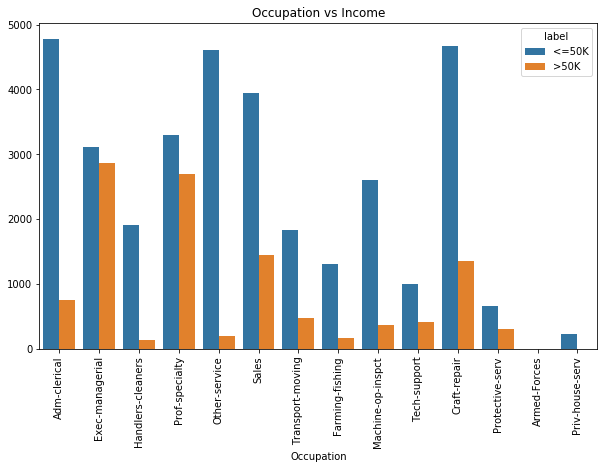

In [11]:
fig = plt.figure(figsize = (10,6))
ax=sns.countplot(dataframe['occupation'], hue=dataframe['label'])
ax.set_title('Occupation vs Income')
plt.xlabel("Occupation",fontsize = 10);
plt.xticks(rotation=90)
plt.ylabel('');

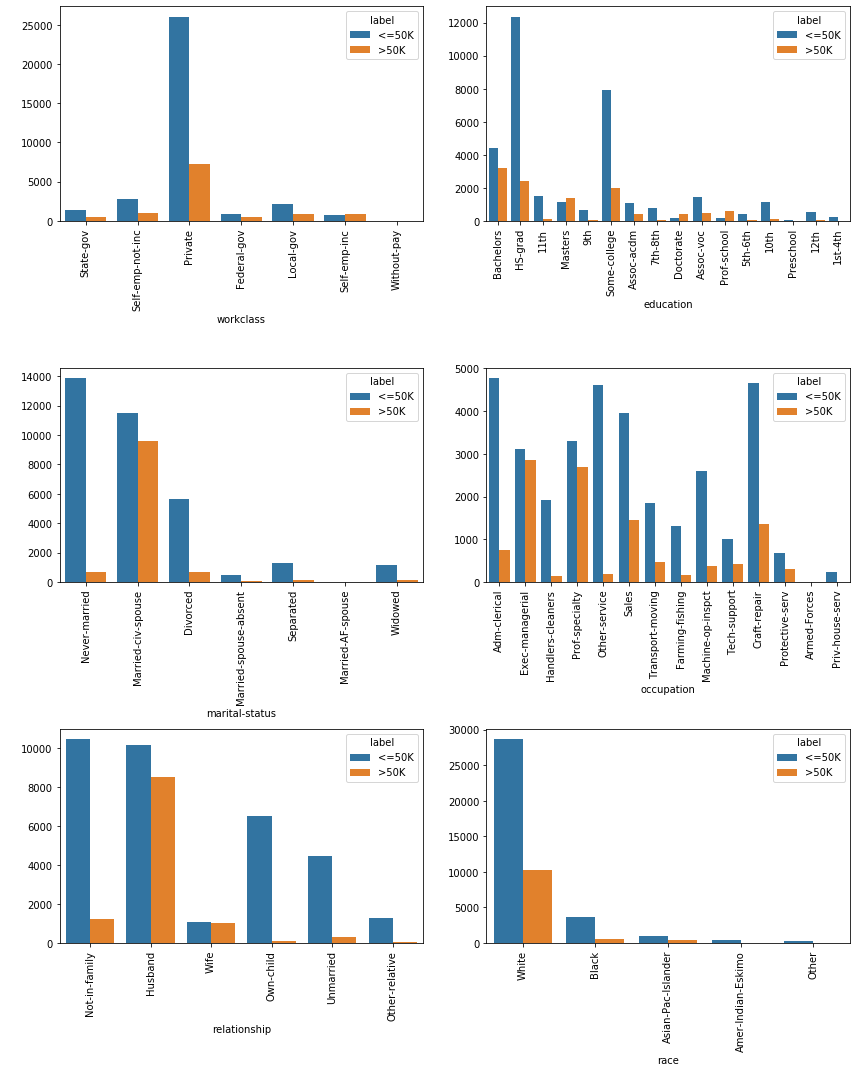

In [12]:
objData = dataframe[objCols[:-2]]
k = len(objData.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 6, m * 5))
for i, (name, col) in enumerate(objData.iteritems()):
    r, c = i // n, i % n
    sns.countplot(dataframe[name], hue=dataframe['label'], ax = axes[r, c])
    axes[r, c].tick_params(axis='x', labelrotation=90)
    axes[r, c].set_ylabel(' ')
fig.tight_layout()
#fig.suptitle('Column vs Income for Object Columns')
plt.show()

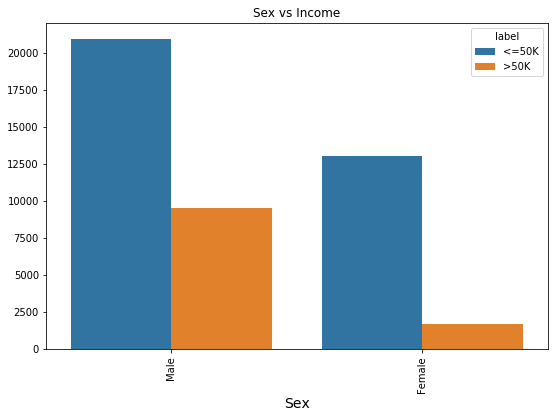

In [13]:
fig = plt.figure(figsize = (9,6))
ax=sns.countplot(dataframe['sex'], hue=dataframe['label'])
ax.set_title('Sex vs Income')
plt.xlabel("Sex",fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

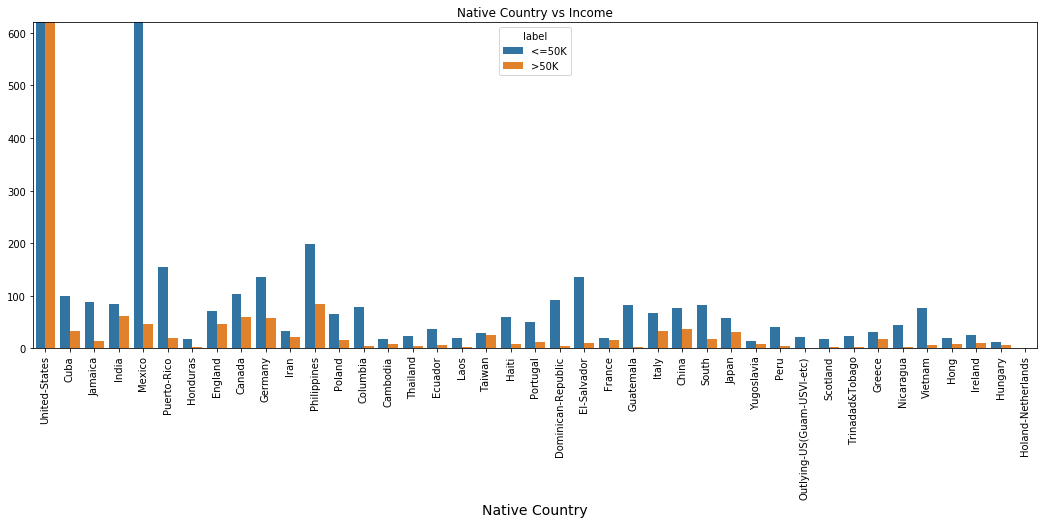

In [14]:
fig = plt.figure(figsize = (18,6))
ax=sns.countplot(dataframe['native-country'], hue=dataframe['label'])
ax.set_title('Native Country vs Income')
plt.xlabel("Native Country",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('')
plt.ylim(0, 620)
plt.show()

In [15]:
def emptyLabel(m):
    return ''

def univariatemosaicplots(col1, col2,title):
    plt.rcParams["figure.figsize"]=(12, 10)
    mosaic(dataframe, [col1,col2],
           gap=0.016, 
           label_rotation=45.0, 
           horizontal=False,
           title=title,
           labelizer=emptyLabel
          )
    plt.show()

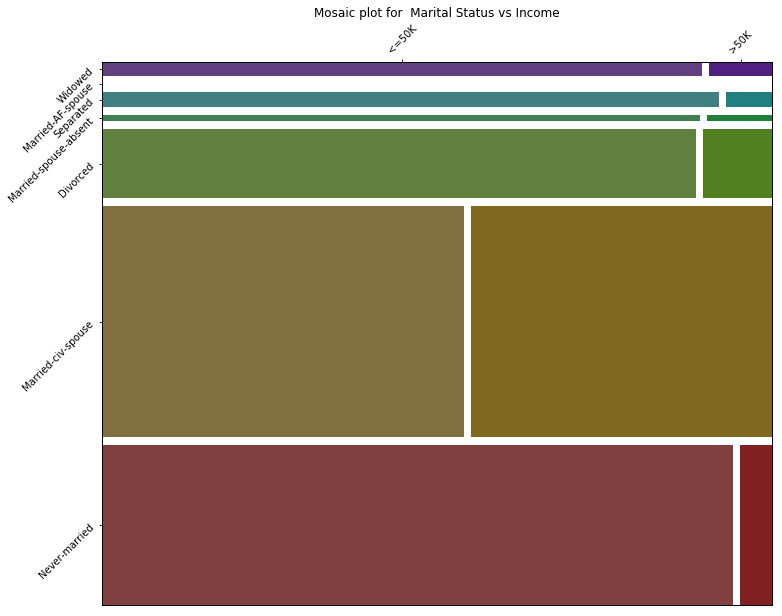

In [16]:
univariatemosaicplots('marital-status','label', 'Mosaic plot for  Marital Status vs Income')

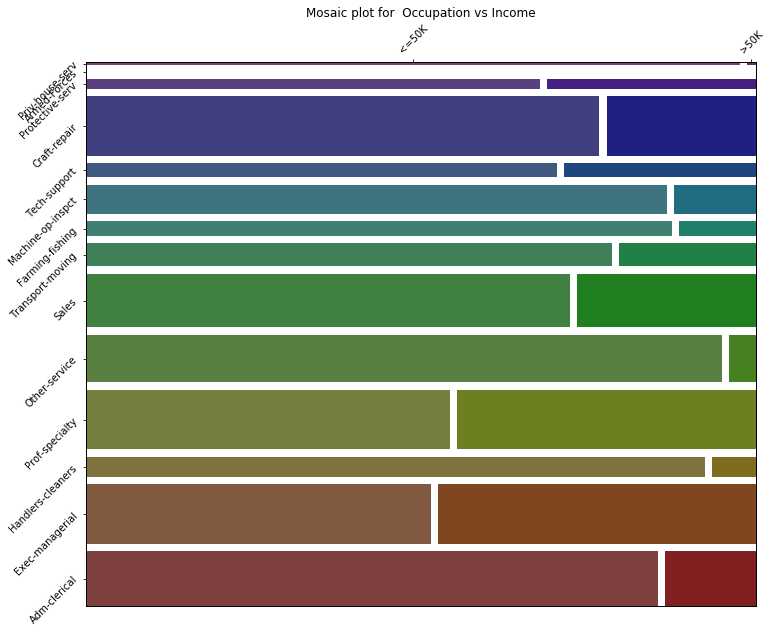

In [17]:
univariatemosaicplots('occupation','label', 'Mosaic plot for  Occupation vs Income')

In [18]:
# dataframe['workclass'] = dataframe['workclass'].astype('category').cat.codes
# dataframe['education'] = dataframe['education'].astype('category').cat.codes
# dataframe['marital-status'] = dataframe['marital-status'].astype('category').cat.codes
# dataframe['occupation'] = dataframe['occupation'].astype('category').cat.codes
# dataframe['relationship'] = dataframe['relationship'].astype('category').cat.codes
# dataframe['race'] = dataframe['race'].astype('category').cat.codes
# dataframe['sex'] = dataframe['sex'].astype('category').cat.codes
# dataframe['native-country'] = dataframe['native-country'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('object')

dataframe['label'] = dataframe['label'].replace({'<=50K': 0, '>50K': 1})
# data = data.drop('education-num',axis=1)
# test['label'] = test['label'].replace({' <=50K.': 0, ' >50K.': 1})
# test = test.drop('education-num',axis=1)
# intCols.remove('education-num')
# print(intCols, objCols)

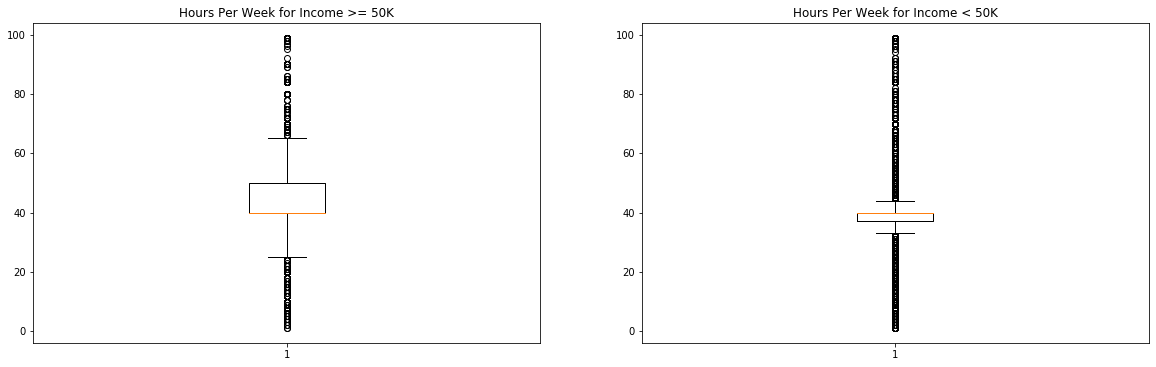

In [19]:
# Visualizations with Box and Whisker plots for the different numerical variables to get an insight into their distribution. 
df = dataframe

plt.figure(figsize=(20,20))

# plt.subplot(3, 2, 1)
# plt.boxplot(df[df['label']==1]['age'].values)
# plt.title('Age distribution for Income >= 50K')

# plt.subplot(3, 2, 2)
# plt.boxplot(df[df['label']==0]['age'].values)
# plt.title('Age distribution for Income < 50K')


plt.subplot(3, 2, 3)
plt.boxplot(df[df['label']==1]['hours-per-week'].values)
plt.title('Hours Per Week for Income >= 50K')

plt.subplot(3, 2, 4)
plt.boxplot(df[df['label']==0]['hours-per-week'].values)
plt.title('Hours Per Week for Income < 50K')

# plt.subplot(3, 2, 5)
# plt.boxplot(df[df['label']==1]['capital-gain'].values)
# plt.title('Capital gain for Salary >= 50K')

# plt.subplot(3, 2, 6)
# plt.boxplot(df[df['label']==0]['capital-gain'].values)
# plt.title('Capital gain for Salary < 50K')
#.astype('int'))
plt.show()


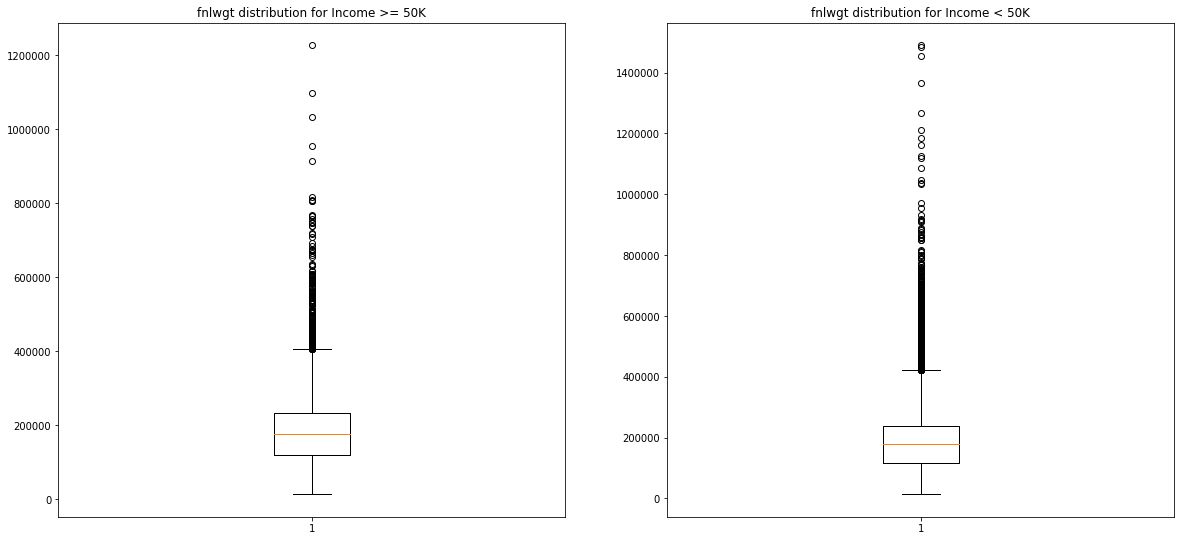

In [20]:
df = dataframe

plt.figure(figsize=(20,20))

# plt.subplot(2, 2, 1)
# plt.boxplot(df[df['label']==1]['capital-loss'].values)
# plt.title('Capital loss distribution for Salary >= 50K')

# plt.subplot(2, 2, 2)
# plt.boxplot(df[df['label']==0]['capital-loss'].values)
# plt.title('Capital loss distribution for Salary < 50K')


plt.subplot(2, 2, 3)
plt.boxplot(df[df['label']==1]['fnlwgt'].values)
plt.title('fnlwgt distribution for Income >= 50K')

plt.subplot(2, 2, 4)
plt.boxplot(df[df['label']==0]['fnlwgt'].values)
plt.title('fnlwgt distribution for Income < 50K')
plt.show()

In [21]:
# fig = dataframe.hist(figsize=(50, 30), ec = 'k')
# p = [x.title.set_size(32) for x in fig.ravel()]

In [22]:
# from sklearn.cluster import KMeans
# Kmean = KMeans(n_clusters=3)
# Kmean.fit(dataframe.loc[:, dataframe.columns != 'label'])

In [23]:
# c2labels = pd.DataFrame(dataframe[Kmean.labels_ == 1]['label'])
# c1labels = pd.DataFrame(dataframe[Kmean.labels_ == 0]['label'])
# c3labels = pd.DataFrame(dataframe[Kmean.labels_ == 2]['label'])
#c4labels = pd.DataFrame(dataframe[Kmean.labels_ == 3]['label'])


In [24]:
# c2labels.plot.hist()

In [25]:
# c1labels.plot.hist()

In [26]:
# c3labels.plot.hist()

In [27]:
# dataframe[['hours-per-week']].hist(bins=20)

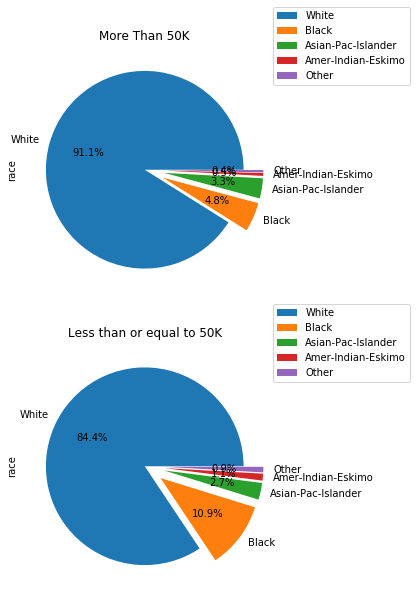

In [28]:
myexplode = [0,0.2, 0.2, 0.2,0.2]
fig,ax=plt.subplots(2,1,figsize=(10,10))
df[df['label'] == 1]['race'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0],explode=myexplode)
ax[0].set_title('More Than 50K')

df[df['label'] == 0]['race'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1],explode=myexplode)
ax[1].set_title('Less than or equal to 50K')

ax[0].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))
ax[1].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))

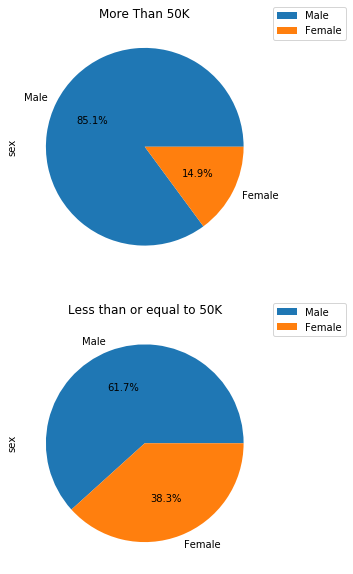

In [29]:
#myexplode = [0,0.2, 0.2]
fig,ax=plt.subplots(2,1,figsize=(10,10))
df[df['label'] == 1]['sex'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K')

df[df['label'] == 0]['sex'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less than or equal to 50K')

ax[0].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))
ax[1].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))

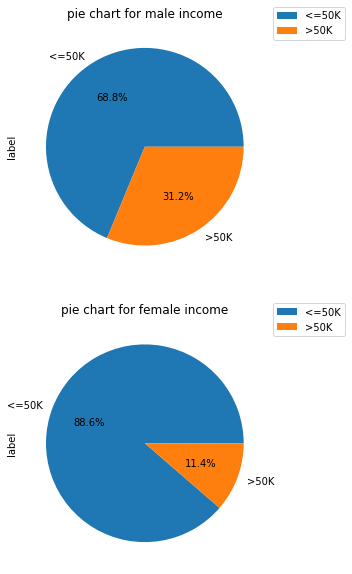

In [30]:
dataframe['label'] = dataframe['label'].replace({0:'<=50K', 1:'>50K'})
fig,ax=plt.subplots(2,1,figsize=(10,10))
df[df['sex'] == 'Male']['label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('pie chart for male income')

df[df['sex'] == 'Female']['label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('pie chart for female income')

ax[0].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))
ax[1].legend(
          loc="center left",
          bbox_to_anchor=(1, 0.5, 1, 1))